In [1]:
%matplotlib inline
import openpathsampling as paths
import numpy as np
from toy_plot_helpers import ToyPlot


In [2]:
import openpathsampling.toy_dynamics as toys
plot = ToyPlot()
pes = (
    toys.toy_pes.OuterWalls([1.0, 1.0], [0.0, 0.0]) +
    toys.toy_pes.Gaussian(-0.7, [12.0, 12.0], [0.0, 0.4]) +
    toys.toy_pes.Gaussian(-0.7, [12.0, 12.0], [-0.5, -0.5]) +
    toys.toy_pes.Gaussian(-0.7, [12.0, 12.0], [0.5, -0.5])
)

plot.contour_range = np.arange(-1.5, 1.0, 0.1)

topology=paths.ToyTopology(
    n_spatial = 2,
    masses =[1.0, 1.0],
    pes = pes
)

template = paths.Snapshot(
    coordinates=np.array([[-0.5, -0.5]]), 
    velocities=np.array([[0.0,0.0]]),
    potential_energy = 0.0, # Important to set energies dimensionless otherwise kcal/mol is default
    kinetic_energy = 0.0,
    topology=topology
)

integ = toys.toy_integrators.LangevinBAOABIntegrator(dt=0.02, temperature=0.1, gamma=2.5)

options={
    'integ' : integ,
    'n_frames_max' : 5000,
    'nsteps_per_frame' : 10
}

toy_eng = toys.toy_engine.ToyEngine(
    options=options,
    template=template
)
toy_eng.initialized = True

toy_eng.current_snapshot = template
paths.PathMover.engine = toy_eng

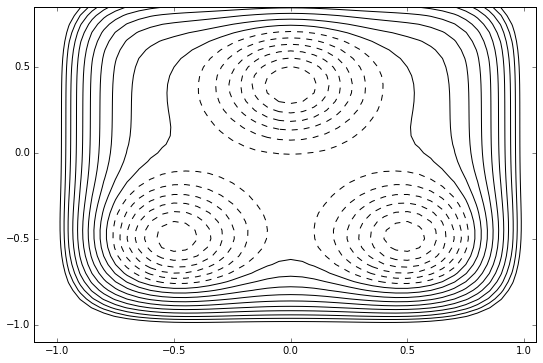

In [3]:
plot.add_pes(pes)
plot.plot()

In [9]:
def circle_sq(snapshot, center):
    return (snapshot.xyz[0]-center[0])**2 + (snapshot.xyz[1]-center[1])**2
    
opA = paths.CV_Function(name="opA", fcn=circle_sq, center=[-0.5, -0.5])
opB = paths.CV_Function(name="opB", fcn=circle_sq, center=[0.5, -0.5])
opC = paths.CV_Function(name="opC", fcn=circle_sq, center=[0.0, 0.4])

In [4]:
# set up the states; interfaces
# bootstrap out of each state to get initial trajectories
# save the initial trajectories to 3 different files.